In [1]:
import numpy as np
import jax.numpy as jnp
import jax
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

is_dark = True
theme, cs = rp.mpl_setup(is_dark)

In [4]:
%cd ~/cdv

/home/nmiklaucic/cdv


/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [6]:
# import ijson
# import gc
# from tqdm import tqdm
# from pymatgen.core import Structure

# with open('data/MPtrj_2022.9_full.json', 'r') as f:
#     objs = ijson.kvitems(f, '', use_float=True)

#     data = []
#     i = 0
#     for _key, vals in tqdm(objs, total=1_590_395):
#         for frame_id, val in vals.items():
#             task, calc, step = frame_id.rsplit('-', maxsplit=2)
#             val['structure'] = Structure.from_dict(val['structure'])
#             val['calc'] = int(calc)
#             val['step'] = int(step)
#             data.append(val)
#         i += 1
#         if i % 4096 == 0:
#             df = pd.DataFrame(data)
#             df.to_pickle(f'precomputed/mptrj/raw/batch_{i // 4096:04}.pkl')
#             data = []
#             del df
#             gc.collect()


# df = pd.DataFrame(data)
# df.to_pickle('precomputed/mptrj/raw/batch_last.pkl')
# df.head()

# print(i)

  9%|▉         | 145923/1590395 [21:47<3:35:41, 111.61it/s]


145923


In [6]:
df = pd.read_pickle('precomputed/mptrj/raw/batch_0001.pkl')
df

,structure,uncorrected_total_energy,corrected_total_energy,energy_per_atom,ef_per_atom,e_per_atom_relaxed,ef_per_atom_relaxed,force,stress,magmom,bandgap,mp_id,calc,step
0,"[[ 2.993532 3.00460347 33.66932291] Sm, [ 0...",-170.605659,-173.353659,-6.191202,-1.554338,-6.193978,-6.193978,"[[0.0, -0.00843286, -0.10743651], [0.0, -0.008...","[[2.42363853, 0.0, 0.0], [0.0, 1.37077983, 0.0...","[0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0...",0.0000,mp-1005792,0,0
1,"[[16.23624819 2.99449969 1.00516514] Sm, [1....",-170.639578,-173.387578,-6.192414,-1.555549,-6.193978,-6.193978,"[[-0.00645421, 0.0, 0.0034], [-0.00693082, 0.0...","[[1.59962644, 0.0, -0.04357102], [0.0, 0.19720...",None,NaN,mp-1005792,0,1
2,"[[16.22148601 2.99515985 1.00498208] Sm, [1....",-170.637204,-173.385204,-6.192329,-1.555464,-6.193978,-6.193978,"[[0.05533164, 0.0, 0.00675507], [-0.04169318, ...","[[1.24970328, 0.0, -0.01879017], [0.0, -0.3692...",None,NaN,mp-1005792,0,0
3,"[[16.2528242 3.00097355 1.00707699] Sm, [1....",-170.622971,-173.370971,-6.191820,-1.554956,-6.193978,-6.193978,"[[0.14672701, 0.0, 0.00872373], [-0.14455934, ...","[[-2.11134699, 0.0, -0.04283535], [0.0, -5.017...",None,NaN,mp-1005792,1,1
4,"[[16.14505453 2.98804997 1.00160178] Sm, [1....",-170.607644,-173.355644,-6.191273,-1.554409,-6.193978,-6.193978,"[[0.0275199, 0.0, 0.01024312], [0.00798949, 0....","[[11.14696563, 0.0, 0.0416178], [0.0, 7.315004...",None,NaN,mp-1005792,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44157,"[[-7.58037053 -1.63555485 -9.89154246] In, [-3...",-192.015545,-205.755545,-6.429861,-2.115880,-6.435917,-6.435917,"[[-0.21686489, -0.0, -0.10622298], [0.21686489...","[[-10.20949589, 0.0, 1.72239781], [0.0, -14.06...",None,NaN,mp-1212081,1,4
44158,"[[-7.57563483 -1.6358857 -9.89310223] In, [-3...",-192.013440,-205.753440,-6.429795,-2.115814,-6.435917,-6.435917,"[[-0.22202529, 0.0, -0.09715492], [0.22202529,...","[[-11.11014908, 0.0, 1.55767313], [0.0, -14.95...",None,NaN,mp-1212081,1,3
44159,"[[-7.52456584 -1.6394541 -9.90992375] In, [-3...",-191.831504,-205.571504,-6.424109,-2.110129,-6.435917,-6.435917,"[[-0.35686702, 0.0, 0.05516663], [0.35686702, ...","[[13.25409348, 0.0, -2.93383367], [0.0, -15.55...",None,NaN,mp-1212081,1,2
44160,"[[-7.46388181 -1.605383 -9.77162238] In, [-3...",-190.215766,-203.955766,-6.373618,-2.059637,-6.435917,-6.435917,"[[0.8222984, -0.0, 1.11178145], [-0.8222984, -...","[[62.04488377, 0.0, -2.20745964], [0.0, 117.05...",None,NaN,mp-1212081,1,0


In [19]:
from cdv.databatch import CrystalGraphs, CrystalData, EdgeData, NodeData
from pymatgen.core import Structure
batch_i = 1
i = 0
row = df.iloc[i]
struct: Structure = row['structure']

data = CrystalData(
    dataset_i=jnp.array([(batch_i - 1) * 4096 + i]),
    abc=jnp.array(struct.lattice.abc),
    angles_rad=jnp.deg2rad(jnp.array(struct.lattice.angles)),
    lat=jnp.array(struct.lattice.matrix),
    e_form=jnp.array([row['energy_per_atom']]),
    bandgap=jnp.array([row['bandgap']]),
    e_total=jnp.array([row['corrected_total_energy']]),
    ehull=jnp.array([]),
    dimensionality=jnp.array([]),
    density=jnp.array([]),
    space_group=jnp.array([]),
    magmom=jnp.array([]),
    num_spec=jnp.array([len(struct.composition.get_el_amt_dict())])
)

data

CrystalData(dataset_i=Array([0], dtype=int32), abc=Array([ 3.991376,  3.999568, 34.82254 ], dtype=float32), angles_rad=Array([1.5707964, 1.5707964, 1.5707964], dtype=float32), lat=Array([[ 3.991376,  0.      ,  0.      ],
       [ 0.      ,  3.999568,  0.      ],
       [ 0.      ,  0.      , 34.82254 ]], dtype=float32), e_form=Array([-6.191202], dtype=float32), bandgap=Array([0.], dtype=float32), e_total=Array([-173.35365], dtype=float32), ehull=Array([], shape=(0,), dtype=float32), dimensionality=Array([], shape=(0,), dtype=float32), density=Array([], shape=(0,), dtype=float32), space_group=Array([], shape=(0,), dtype=float32), magmom=Array([], shape=(0,), dtype=float32), num_spec=Array([4], dtype=int32))

In [67]:
row['stress']

[[2.42363853, 0.0, 0.0], [0.0, 1.37077983, 0.0], [0.0, 0.0, -2.01769061]]

In [15]:
row['structure'].composition.get_el_amt_dict()

{'Sm': 8.0, 'Cu': 4.0, 'As': 12.0, 'O': 4.0}

In [53]:
def knn_graph(struct: Structure, r_start=8, k=16):
    """returns (ijs, ims)
    ijs: nodes k
    ims: nodes k 3"""
    graph_ijs = []
    graph_ims = []
    r = r_start
    for i, nbs in enumerate(struct.get_all_neighbors(r)):
        sites, dists, idxs, ims = zip(*nbs)
        if len(dists) < k:
            print('Not enough neighbors, using r =', 2 * r_start)
            return knn_graph(struct, r_start=r * 2, k=k)
        
        chosen = np.argsort(dists)[:k]

        graph_ijs.append(np.array(idxs)[chosen])
        graph_ims.append(np.array(ims)[chosen])

    graph_ijs = np.stack(graph_ijs).astype(np.uint16)
    graph_ims = np.stack(graph_ims).astype(np.int8)

    return graph_ijs, graph_ims

ijs, ims = knn_graph(struct)
ims.shape

(28, 16, 3)

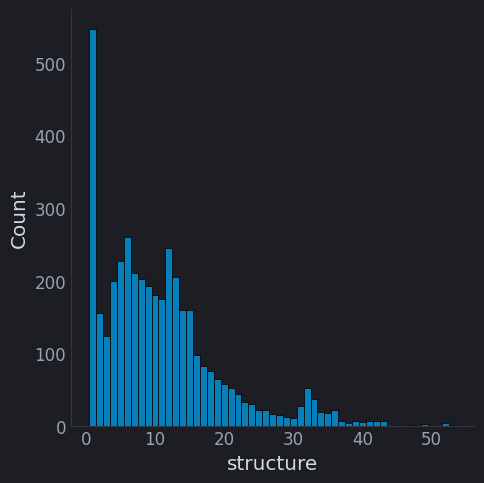

In [59]:
sns.displot(df.groupby('mp_id').count()['structure'], discrete=True)

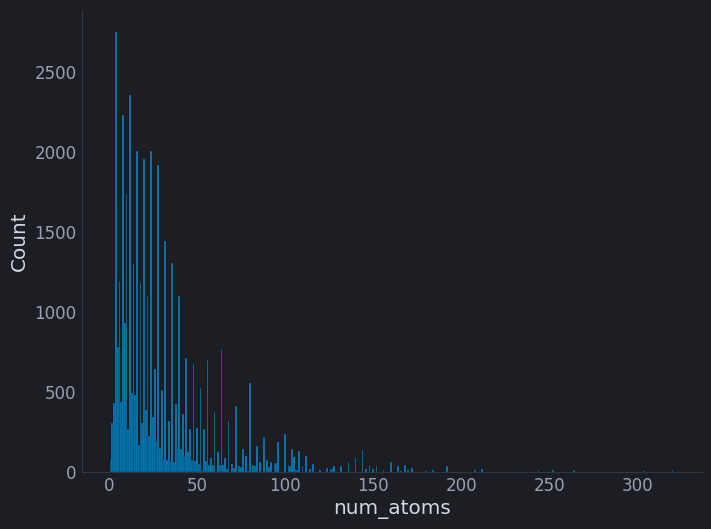

In [66]:
df['num_atoms'] = [s.num_sites for s in df['structure']]
sns.histplot(df['num_atoms'], discrete=True)
rp.smart_ticks()